In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
question = pd.read_csv('data/schema.csv')
question.shape

(290, 3)

In [3]:
answer = pd.read_csv('data/multipleChoiceResponses.csv', encoding="ISO-8859-1", low_memory=False)
answer.shape

(16716, 228)

## Missing questions

The question data has 290 questions, but in answer file there are only 228 answers by 16716 respondent. Means, 290-228 = 62 questions are not answered at all. Which questions are remained empty?

In [4]:
len(answer.columns[pd.isnull(answer).all()].tolist())

0

In [5]:
cnt = answer.isnull().sum()
len(cnt[cnt == 16000])

0

In [6]:
dropped = answer.dropna(axis= 1, how = 'all')
dropped.shape

(16716, 228)

First, we need to check if the number of missing data is equal to 62. But it wasn't.

**Mistery Unsolved.**

## Analyzing Korean respondent

The number of interviewees in Korea: 194


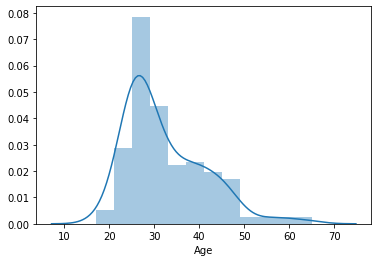

In [7]:
korea = answer.loc[(answer['Country']=='South Korea')]
print('The number of interviewees in Korea: '+str(korea.shape[0]))
sns.distplot(korea['Age'].dropna())
plt.show()

In [8]:
major_count = pd.DataFrame(
    korea['MajorSelect'].value_counts())
major_percent = pd.DataFrame(
    korea['MajorSelect'].value_counts(normalize=True))
major_df = major_count.merge(
            major_percent, left_index = True, right_index = True)
major_df.columns = ['응답 수','비율']
major_df

,응답 수,비율
Computer Science,48,0.360902
Mathematics or statistics,33,0.248120
Electrical Engineering,14,0.105263
Other,13,0.097744
Engineering (non-computer focused),11,0.082707
A social science,5,0.037594
"Information technology, networking, or system administration",3,0.022556
Physics,2,0.015038
Biology,1,0.007519
Management information systems,1,0.007519


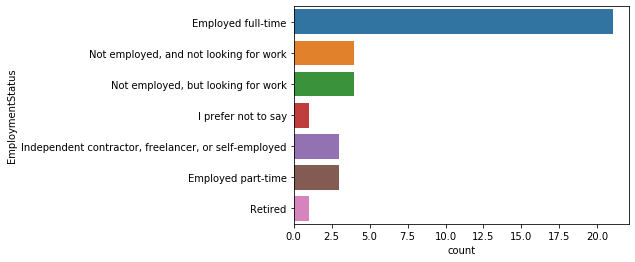

In [9]:
female = korea.loc[korea['GenderSelect'] == 'Female']
sns.countplot(y= 'EmploymentStatus', data=female)